# Time Series Forecasting (exponential smoothing) in R
#### This is a practice of what's on https://otexts.com/fpp2/ets-forecasting.html
#### Data is from https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
#### & https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [20]:
# Load the libraries.
library(forecast)
library(fpp2)

In [21]:
# Read data
Data <- read.csv('us-states.csv', header=TRUE)

# date and state come in as factors. Change them to characters.
Data$date  <- as.Date(Data$date)
Data$state <- as.character(Data$state)

# Cursory check
Data

date,state,fips,cases,deaths
<date>,<chr>,<int>,<int>,<int>
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0


In [22]:
# Consolidate California cases as CA data frame.
# Aggregate all states as US data frame.
# Calculate differences between rows. This is is daily_new
library(dplyr)

CA <- Data[(Data$state=='California'),c('date','cases')] %>% mutate(daily_new=c(0, diff(cases)))
CA

US <- aggregate(cases ~ date, data=Data, sum) %>% mutate(daily_new=c(0, diff(cases)))
US

date,cases,daily_new
<date>,<int>,<dbl>
2020-01-25,1,0
2020-01-26,2,1
2020-01-27,2,0
2020-01-28,2,0
2020-01-29,2,0
2020-01-30,2,0
2020-01-31,3,1
2020-02-01,3,0
2020-02-02,6,3


date,cases,daily_new
<date>,<int>,<dbl>
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,1
2020-01-25,3,1
2020-01-26,5,2
2020-01-27,5,0
2020-01-28,5,0
2020-01-29,5,0


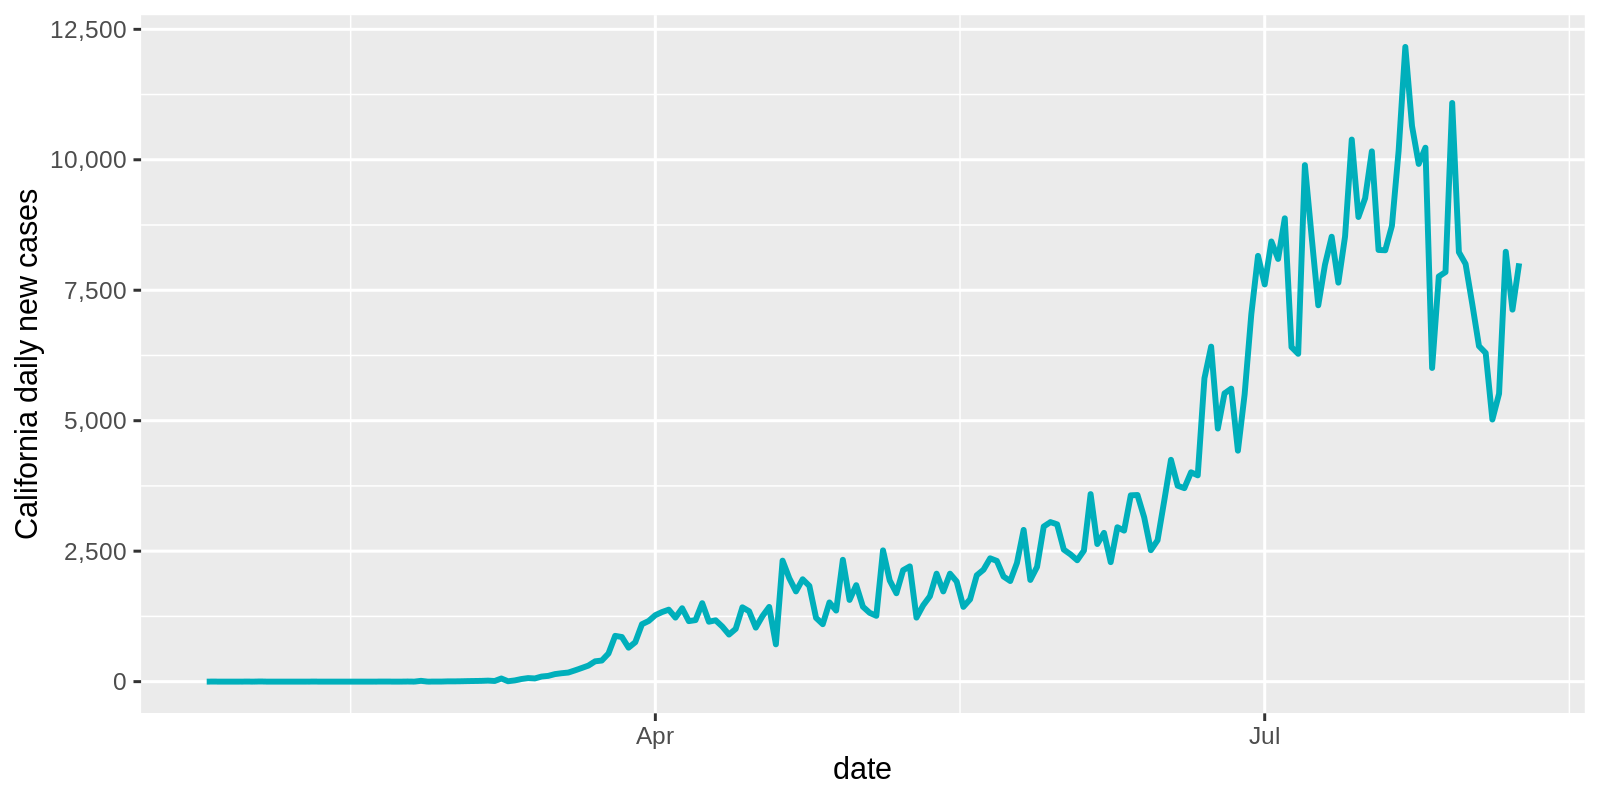

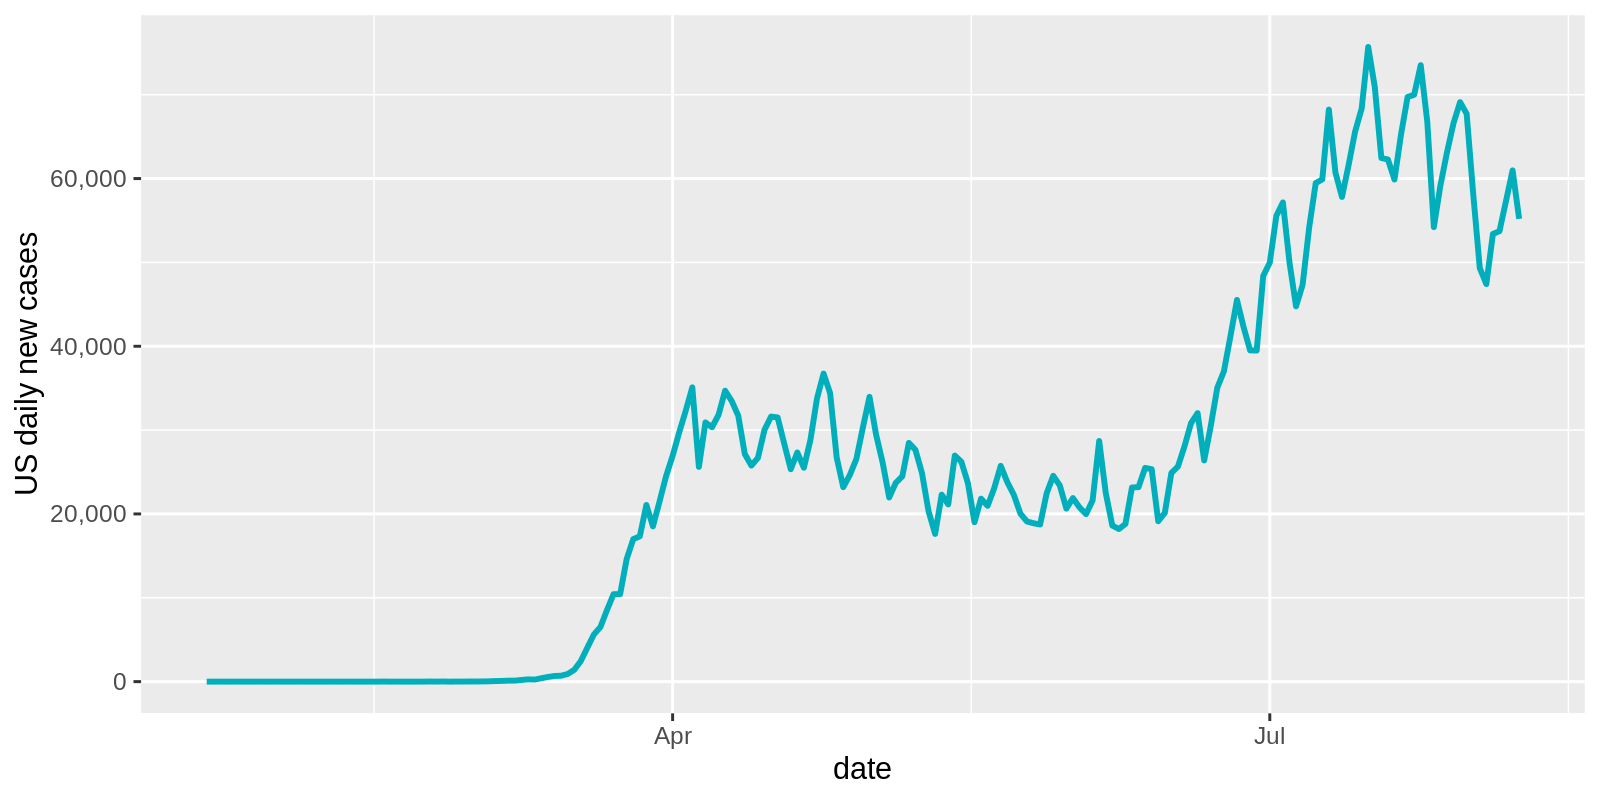

In [23]:
# Plot 'daily_new'(y) vs 'date'(x) for California
options(repr.plot.height=4, repr.plot.width=8, repr.plot.res = 200)
ggplot(data = CA, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)

# Plot 'daily_new'(y) vs 'date'(x) for US
ggplot(data = US, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [24]:
# Select data where daily_new becomes >=100
day1 <- CA %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
CA <- CA[CA$date>=day1$date,]
CA

day1 <- US %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
US <- US[US$date>=day1$date,]
US

,date,cases,daily_new
,<date>,<int>,<dbl>
52,2020-03-16,588,110
53,2020-03-17,732,144
54,2020-03-18,893,161
55,2020-03-19,1067,174
56,2020-03-20,1283,216
57,2020-03-21,1544,261
58,2020-03-22,1851,307
59,2020-03-23,2240,389
60,2020-03-24,2644,404


,date,cases,daily_new
,<date>,<int>,<dbl>
47,2020-03-07,428,117
48,2020-03-08,547,119
49,2020-03-09,748,201
50,2020-03-10,1018,270
51,2020-03-11,1263,245
52,2020-03-12,1668,405
53,2020-03-13,2224,556
54,2020-03-14,2898,674
55,2020-03-15,3600,702


In [25]:
# Convert the data frames to time series.
CAts = ts(CA$daily_new, frequency=7)
print(CAts, calendar = TRUE)

USts = ts(US$daily_new, frequency=7)
print(USts, calendar = TRUE)

      p1    p2    p3    p4    p5    p6    p7
1    110   144   161   174   216   261   307
2    389   404   539   877   855   651   755
3   1100  1162  1274  1333  1379  1227  1406
4   1159  1179  1503  1148  1175  1055   902
5   1011  1424  1349  1035  1256  1431   715
6   2318  1982  1729  1961  1834  1222  1101
7   1517  1362  2334  1566  1848  1435  1319
8   1261  2515  1939  1694  2135  2208  1227
9   1463  1636  2068  1729  2068  1918  1433
10  1577  2038  2144  2363  2313  2014  1928
11  2274  2907  1949  2198  2972  3057  3014
12  2529  2438  2326  2510  3593  2637  2850
13  2290  2958  2894  3570  3576  3149  2519
14  2709  3469  4250  3754  3708  4011  3953
15  5813  6419  4850  5524  5614  4426  5502
16  7040  8158  7611  8434  8100  8878  6411
17  6282  9897  8538  7212  7989  8525  7646
18  8530 10387  8904  9264 10161  8272  8266
19  8735 10171 12162 10647  9921 10231  6011
20  7765  7848 11088  8230  8004  7234  6430
21  6298  5023  5518  8237  7129  8016      
      p1  

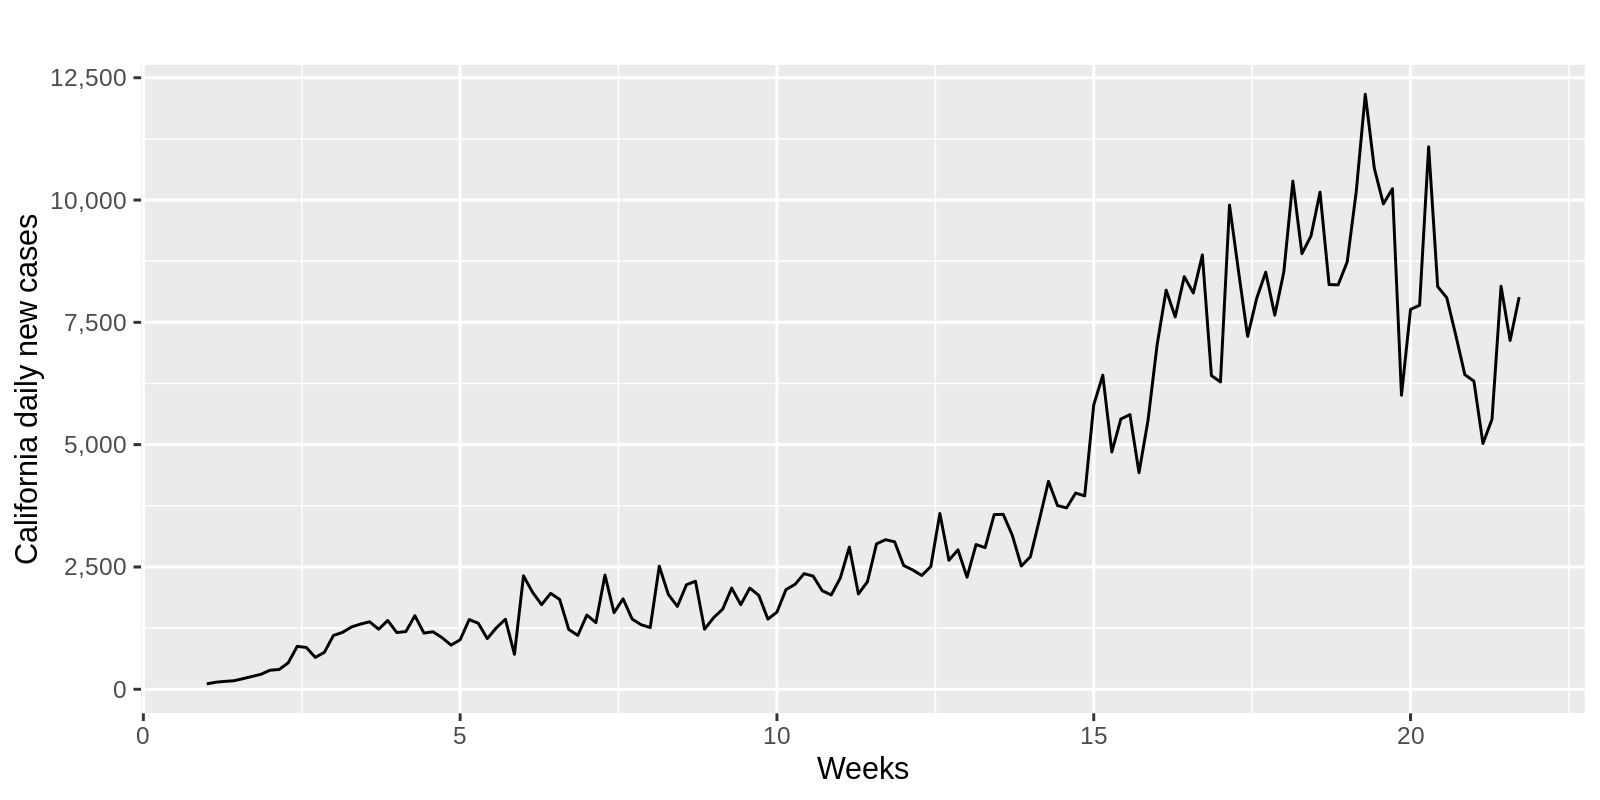

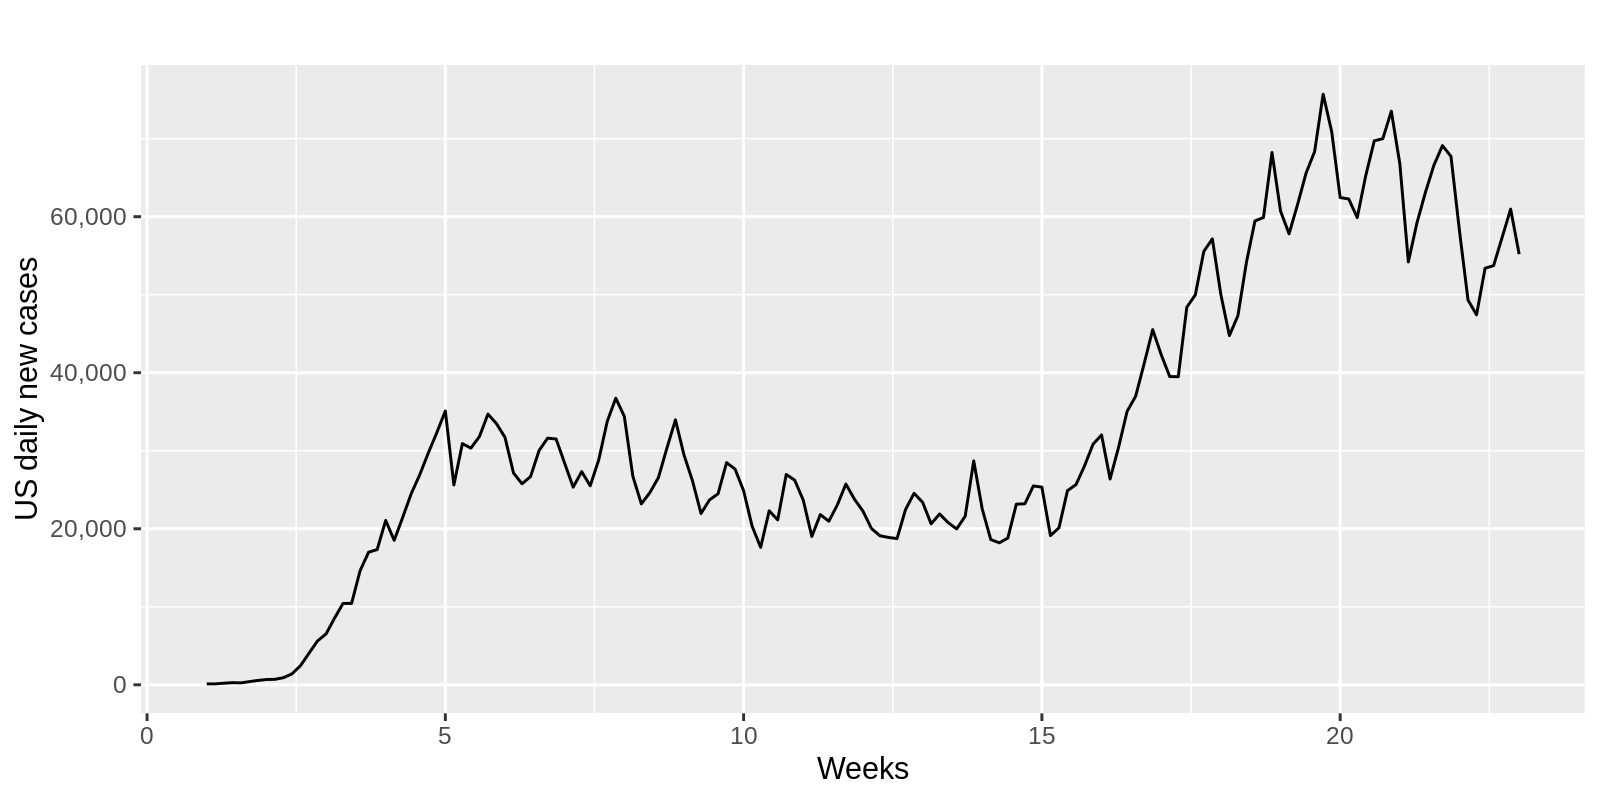

In [26]:
# Check the time series data
autoplot(CAts) +
    xlab("Weeks") +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)
autoplot(USts) +
    xlab("Weeks") +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [27]:
# Forecase California data first
fit <- ets(CAts, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL,
    gamma=NULL, phi=NULL, lambda=NULL, biasadj=FALSE,
    additive.only=FALSE, restrict=TRUE,
    allow.multiplicative.trend=FALSE)
summary(fit)

ETS(M,A,N) 

Call:
 ets(y = CAts, model = "ZZZ", damped = NULL, alpha = NULL, beta = NULL,  

 Call:
     gamma = NULL, phi = NULL, additive.only = FALSE, lambda = NULL,  

 Call:
     biasadj = FALSE, restrict = TRUE, allow.multiplicative.trend = FALSE) 

  Smoothing parameters:
    alpha = 0.3003 
    beta  = 1e-04 

  Initial states:
    l = 29.1557 
    b = 52.3437 

  sigma:  0.2159

     AIC     AICc      BIC 
2583.164 2583.593 2598.082 

Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE      MASE      ACF1
Training set -6.475174 896.8654 583.5734 -5.105937 17.65139 0.6974421 0.2716001


In [37]:
# Smoothing parameters
#    alpha: the smoothing parameter for level
#    beta:  the smoothing parameter for the trend
#    gamma: the smoothing parameter for the seasonal component
#    phi:   damping parameter. this dampens the effect of trend to the forecasting. In practice rarely less than 0.8.
#
# Traditionally, 0<beta<alpha<1, 0<gamma<1-alpha, 0.8<phi<0.98
#
# Level: the smoothed value of the series at time t (a weighted average of observation y_t).
# trend: a long-term increase or decrease in the data. sometimes we will refer to a trend as "changing direction", 
#         when it might go from an increasing trend to a decreasing trend.
# slope: the average predicted change in y resulting from a one unit increase in x. This is really the usual 'slope'.
#
# AIC:   Akaike's Information Criterion. It is to penalize the fit of the model (SSE) with thenumber of parameters that 
#        need to be estimated. The model with the minimum value of the AIC is often the best model for forecasting.
# AICc:  Corrected Akaike's Information Criterion. For small number of observations, the AIC tends to select too many
#        predictors, and so a bias-corrected version of the AIC has been developed.
# BIC:   Schwarz's Bayesian Information Criterion. BIC penalizes the number of parameters more heavily than the AIC.
#        Minimizing the BIC is intended to give the best model.
#

In [29]:
coef(fit)
accuracy(fit)

alpha         beta            l            b 
3.002986e-01 1.000026e-04 2.915566e+01 5.234373e+01

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-6.475174,896.8654,583.5734,-5.105937,17.65139,0.6974421,0.2716001


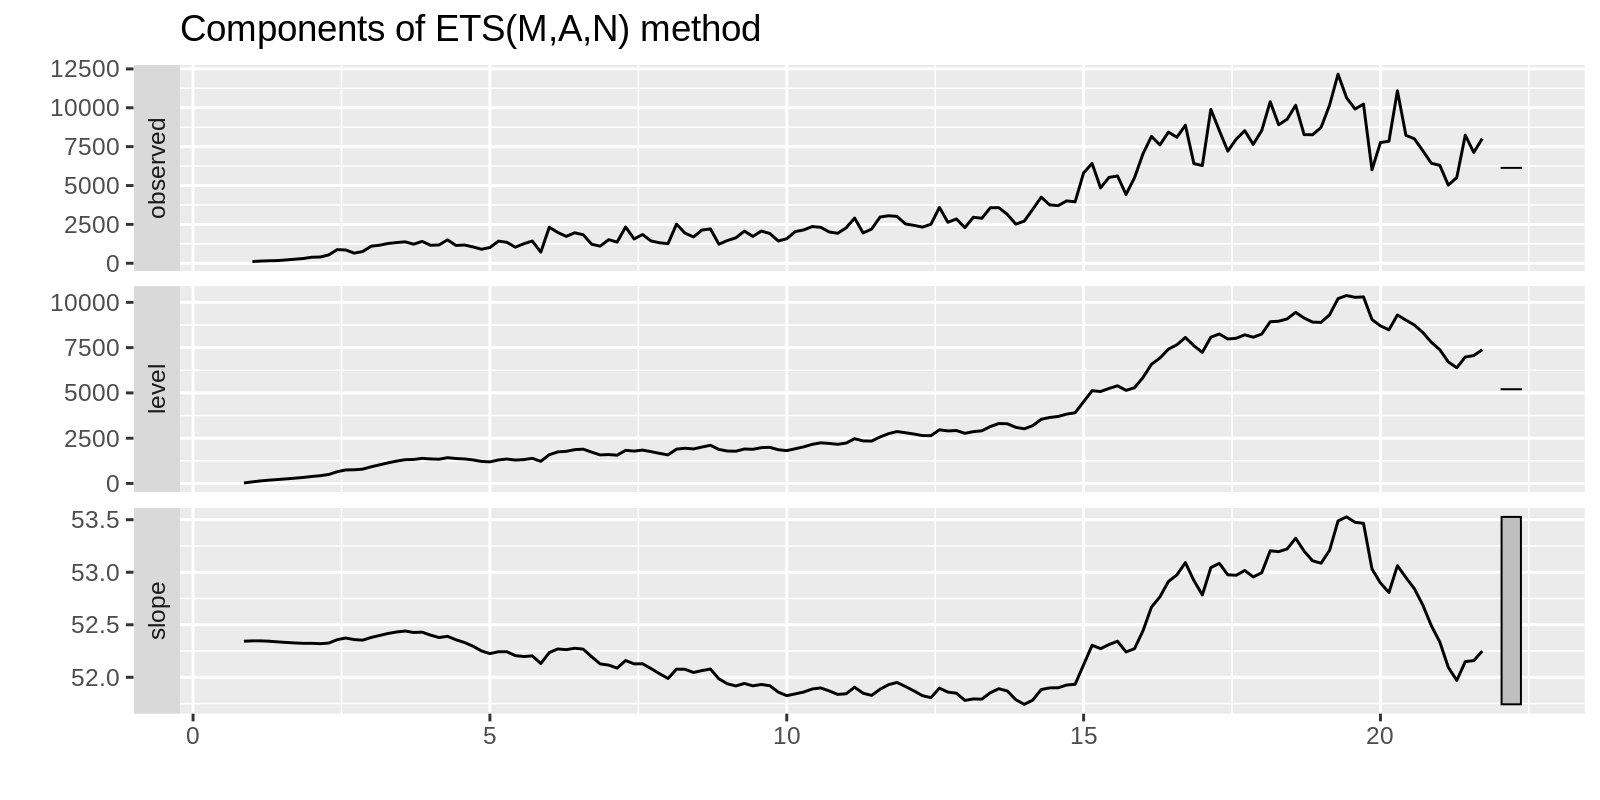

In [30]:
autoplot(fit)

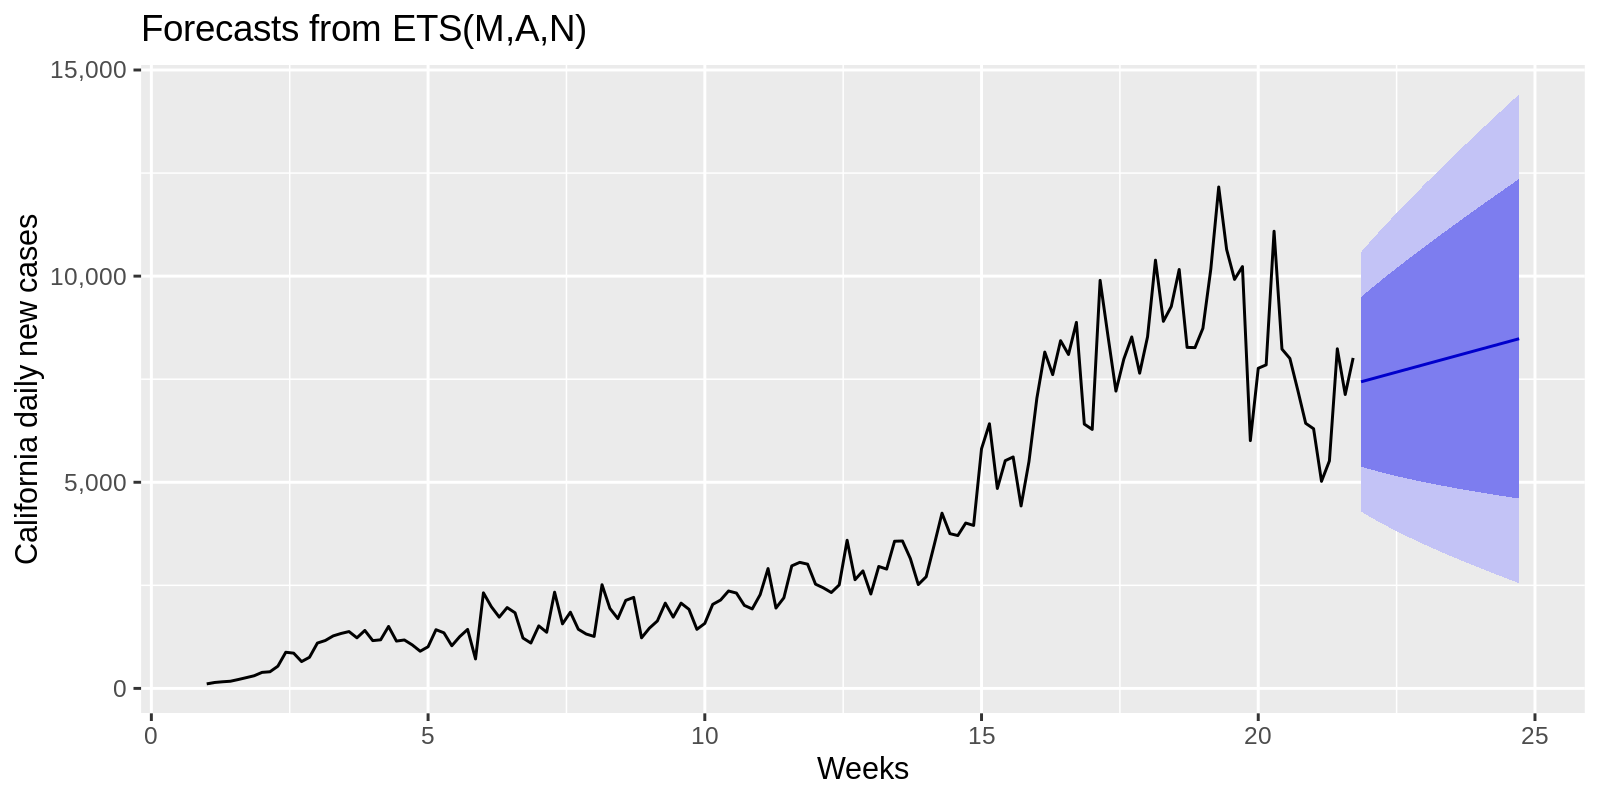

In [31]:
fit %>% forecast(h=21) %>%
  autoplot() +
  xlab('Weeks') + 
  scale_y_continuous(name='California daily new cases', labels = scales::comma)

In [32]:
fit %>% forecast(h=21)

         Point Forecast    Lo 80     Hi 80    Lo 95    Hi 95
21.85714       7437.036 5379.595  9494.477 4290.451 10583.62
22.00000       7489.285 5323.057  9655.512 4176.326 10802.24
22.14286       7541.534 5269.966  9813.102 4067.471 11015.60
22.28571       7593.783 5219.846  9967.721 3963.159 11224.41
22.42857       7646.032 5172.312 10119.753 3862.803 11429.26
22.57143       7698.282 5127.048 10269.515 3765.920 11630.64
22.71429       7750.531 5083.792 10417.270 3672.105 11828.96
22.85714       7802.780 5042.320 10563.240 3581.020 12024.54
23.00000       7855.029 5002.442 10707.616 3492.374 12217.68
23.14286       7907.278 4963.997 10850.560 3405.917 12408.64
23.28571       7959.528 4926.841 10992.214 3321.434 12597.62
23.42857       8011.777 4890.853 11132.701 3238.735 12784.82
23.57143       8064.026 4855.922 11272.130 3157.654 12970.40
23.71429       8116.275 4821.953 11410.597 3078.044 13154.51
23.85714       8168.524 4788.861 11548.188 2999.775 13337.27
24.00000       8220.774 

In [129]:
# Forecase US cases
fit <- ets(USts, model="ZZZ", damped=NULL, alpha=NULL, beta=NULL,
    gamma=NULL, phi=NULL, lambda=NULL, biasadj=FALSE,
    additive.only=FALSE, restrict=TRUE,
    allow.multiplicative.trend=FALSE)
summary(fit)

ETS(A,N,A) 

Call:
 ets(y = USts, model = "ZZZ", damped = NULL, alpha = NULL, beta = NULL,  

 Call:
     gamma = NULL, phi = NULL, additive.only = FALSE, lambda = NULL,  

 Call:
     biasadj = FALSE, restrict = TRUE, allow.multiplicative.trend = FALSE) 

  Smoothing parameters:
    alpha = 0.931 
    gamma = 1e-04 

  Initial states:
    l = 1679.447 
    s = 4163.264 2946.982 365.882 -1250.754 -3414.418 -3755.942
           944.9865

  sigma:  2890.984

     AIC     AICc      BIC 
3262.958 3264.486 3293.392 

Training set error measures:
                   ME     RMSE      MAE      MPE    MAPE      MASE        ACF1
Training set 365.4374 2805.797 2246.493 4.039608 69.8989 0.4157451 -0.02036268


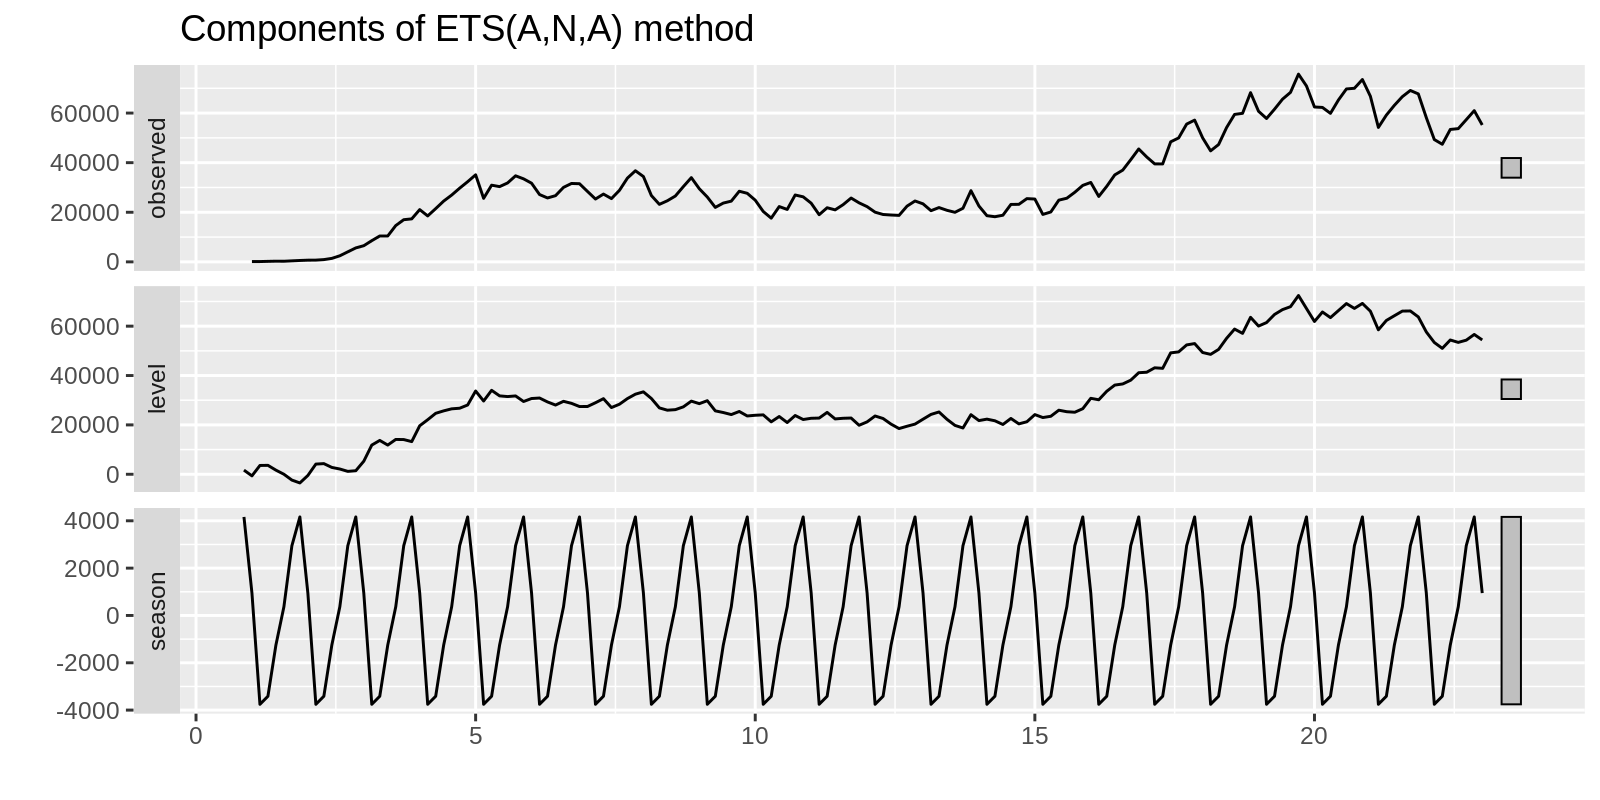

In [130]:
autoplot(fit)

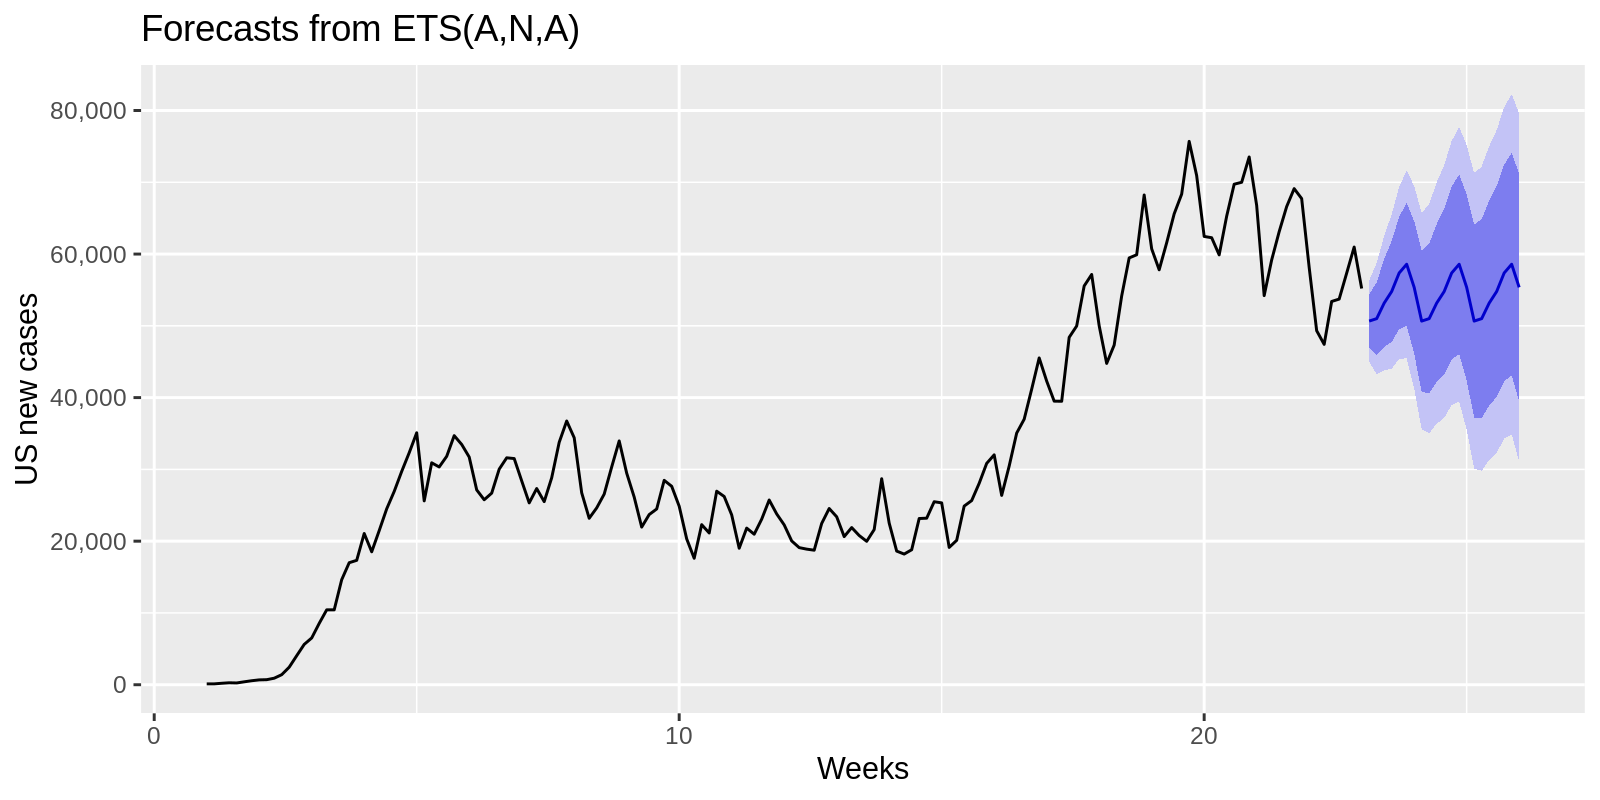

In [131]:
fit %>% forecast(h=21) %>%
  autoplot() +
  xlab('Weeks') + 
  scale_y_continuous(name='US new cases', labels = scales::comma)

In [132]:
fit %>% forecast(h=21)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
23.14286       50660.57 46955.63 54365.52 44994.35 56326.80
23.28571       51001.70 45939.60 56063.81 43259.88 58743.53
23.42857       53165.08 47039.46 59290.70 43796.75 62533.41
23.57143       54781.95 47751.91 61812.00 44030.43 65533.48
23.71429       57363.03 49532.34 65193.73 45387.02 69339.05
23.85714       58579.48 50022.72 67136.24 45493.04 71665.91
24.00000       55360.55 46134.55 64586.54 41250.60 69470.49
24.14286       50660.57 40810.84 60510.31 35596.70 65724.44
24.28571       51001.70 40565.44 61437.97 35040.81 66962.59
24.42857       53165.08 42173.54 64156.62 36354.97 69975.18
24.57143       54781.95 43261.87 66302.03 37163.51 72400.39
24.71429       57363.03 45337.62 69388.45 38971.76 75754.31
24.85714       58579.48 46069.13 71089.83 39446.55 77712.41
25.00000       55360.55 42383.27 68337.82 35513.52 75207.58
25.14286       50660.57 37232.69 64088.45 30124.40 71196.74
25.28571       51001.70 37137.85 64865.5

# Facebook's Prophet
#### This is a practice of what's on https://facebook.github.io/prophet/docs/quick_start.html#r-api
#### Data is from https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv
#### & https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv

In [87]:
library(prophet)

In [88]:
# Read data
Data <- read.csv('us-states.csv', header=TRUE)

# date and state come in as factors. Change them to characters.
Data$date  <- as.Date(Data$date)
Data$state <- as.character(Data$state)

# Cursory check
Data

date,state,fips,cases,deaths
<date>,<chr>,<int>,<int>,<int>
2020-01-21,Washington,53,1,0
2020-01-22,Washington,53,1,0
2020-01-23,Washington,53,1,0
2020-01-24,Illinois,17,1,0
2020-01-24,Washington,53,1,0
2020-01-25,California,6,1,0
2020-01-25,Illinois,17,1,0
2020-01-25,Washington,53,1,0
2020-01-26,Arizona,4,1,0


In [89]:
# Consolidate California cases as CA data frame.
# Aggregate all states as US data frame.
# Calculate differences between rows. This is is daily_new
library(dplyr)

CA <- Data[(Data$state=='California'),c('date','cases')] %>% mutate(daily_new=c(0, diff(cases)))
CA

US <- aggregate(cases ~ date, data=Data, sum) %>% mutate(daily_new=c(0, diff(cases)))
US

date,cases,daily_new
<date>,<int>,<dbl>
2020-01-25,1,0
2020-01-26,2,1
2020-01-27,2,0
2020-01-28,2,0
2020-01-29,2,0
2020-01-30,2,0
2020-01-31,3,1
2020-02-01,3,0
2020-02-02,6,3


date,cases,daily_new
<date>,<int>,<dbl>
2020-01-21,1,0
2020-01-22,1,0
2020-01-23,1,0
2020-01-24,2,1
2020-01-25,3,1
2020-01-26,5,2
2020-01-27,5,0
2020-01-28,5,0
2020-01-29,5,0


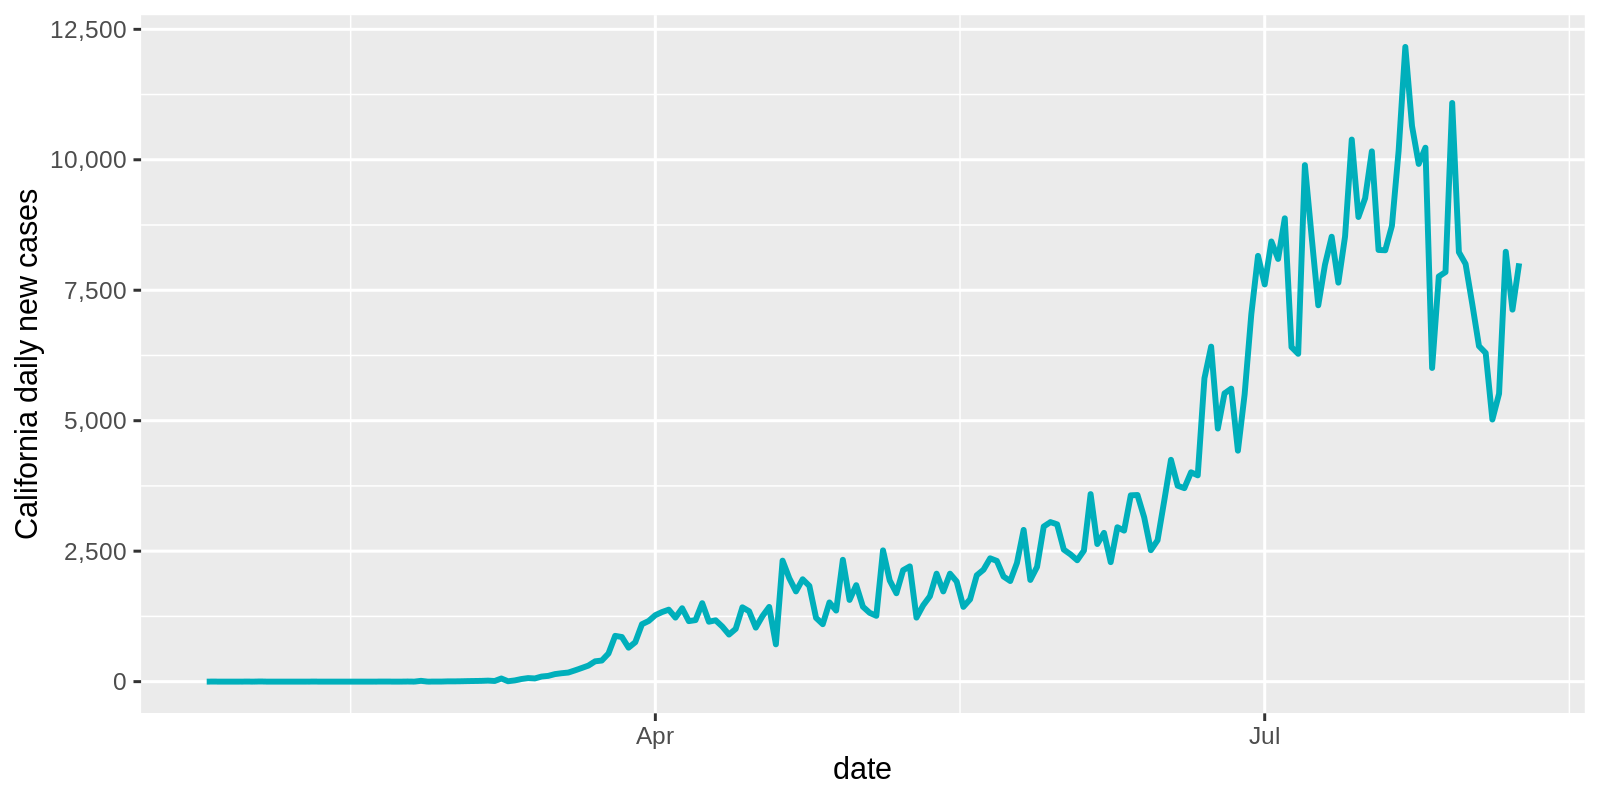

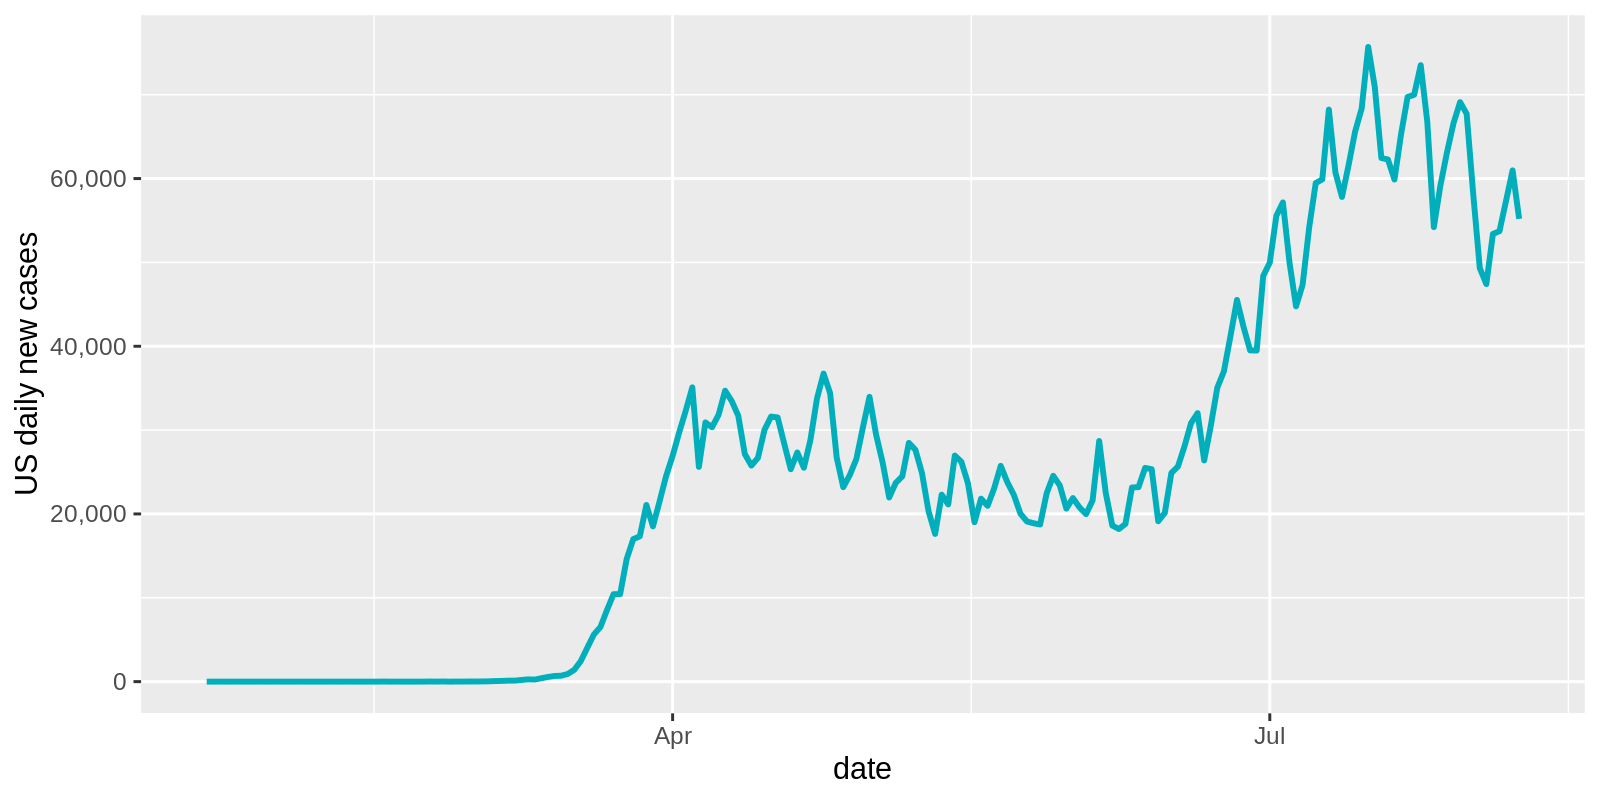

In [90]:
# Plot 'daily_new'(y) vs 'date'(x) for California
options(repr.plot.height=4, repr.plot.width=8, repr.plot.res = 200)
ggplot(data = CA, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='California daily new cases', labels = scales::comma)

# Plot 'daily_new'(y) vs 'date'(x) for US
ggplot(data = US, aes(x = date, y = daily_new)) +
    geom_line(color = "#00AFBB", size = 1) +
    scale_y_continuous(name='US daily new cases', labels = scales::comma)

In [91]:
# Select data where daily_new becomes >=100
day1 <- CA %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
CA <- CA[CA$date>=day1$date,]
CA

day1 <- US %>% arrange(date) %>% filter(daily_new>=100) %>% slice(1)
US <- US[US$date>=day1$date,]
US

,date,cases,daily_new
,<date>,<int>,<dbl>
52,2020-03-16,588,110
53,2020-03-17,732,144
54,2020-03-18,893,161
55,2020-03-19,1067,174
56,2020-03-20,1283,216
57,2020-03-21,1544,261
58,2020-03-22,1851,307
59,2020-03-23,2240,389
60,2020-03-24,2644,404


,date,cases,daily_new
,<date>,<int>,<dbl>
47,2020-03-07,428,117
48,2020-03-08,547,119
49,2020-03-09,748,201
50,2020-03-10,1018,270
51,2020-03-11,1263,245
52,2020-03-12,1668,405
53,2020-03-13,2224,556
54,2020-03-14,2898,674
55,2020-03-15,3600,702


In [92]:
# Select date and daily_new, and change their names to ds and y.
# Prophet likes it that way. ¯\_(ツ)_/¯
US_p = US[,c('date','daily_new')]
names(US_p)[1] = 'ds'
names(US_p)[2] = 'y'
US_p

,ds,y
,<date>,<dbl>
47,2020-03-07,117
48,2020-03-08,119
49,2020-03-09,201
50,2020-03-10,270
51,2020-03-11,245
52,2020-03-12,405
53,2020-03-13,556
54,2020-03-14,674
55,2020-03-15,702


In [93]:
m <- prophet(US_p, weekly.seasonality=TRUE)

Disabling yearly seasonality. Run prophet with yearly.seasonality=TRUE to override this.

Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



In [94]:
future <- make_future_dataframe(m, periods = 21)
tail(future)

,ds
,<dttm>
171,2020-08-24
172,2020-08-25
173,2020-08-26
174,2020-08-27
175,2020-08-28
176,2020-08-29


In [95]:
forecast <- predict(m, future)
tail(forecast[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
171,2020-08-24,72898.37,61303.98,83211.01
172,2020-08-25,75506.88,64654.37,86424.71
173,2020-08-26,77687.02,66396.21,88515.90
174,2020-08-27,80816.65,69597.76,92162.20
175,2020-08-28,82650.48,71479.19,93229.25
176,2020-08-29,79423.11,68092.58,90816.45


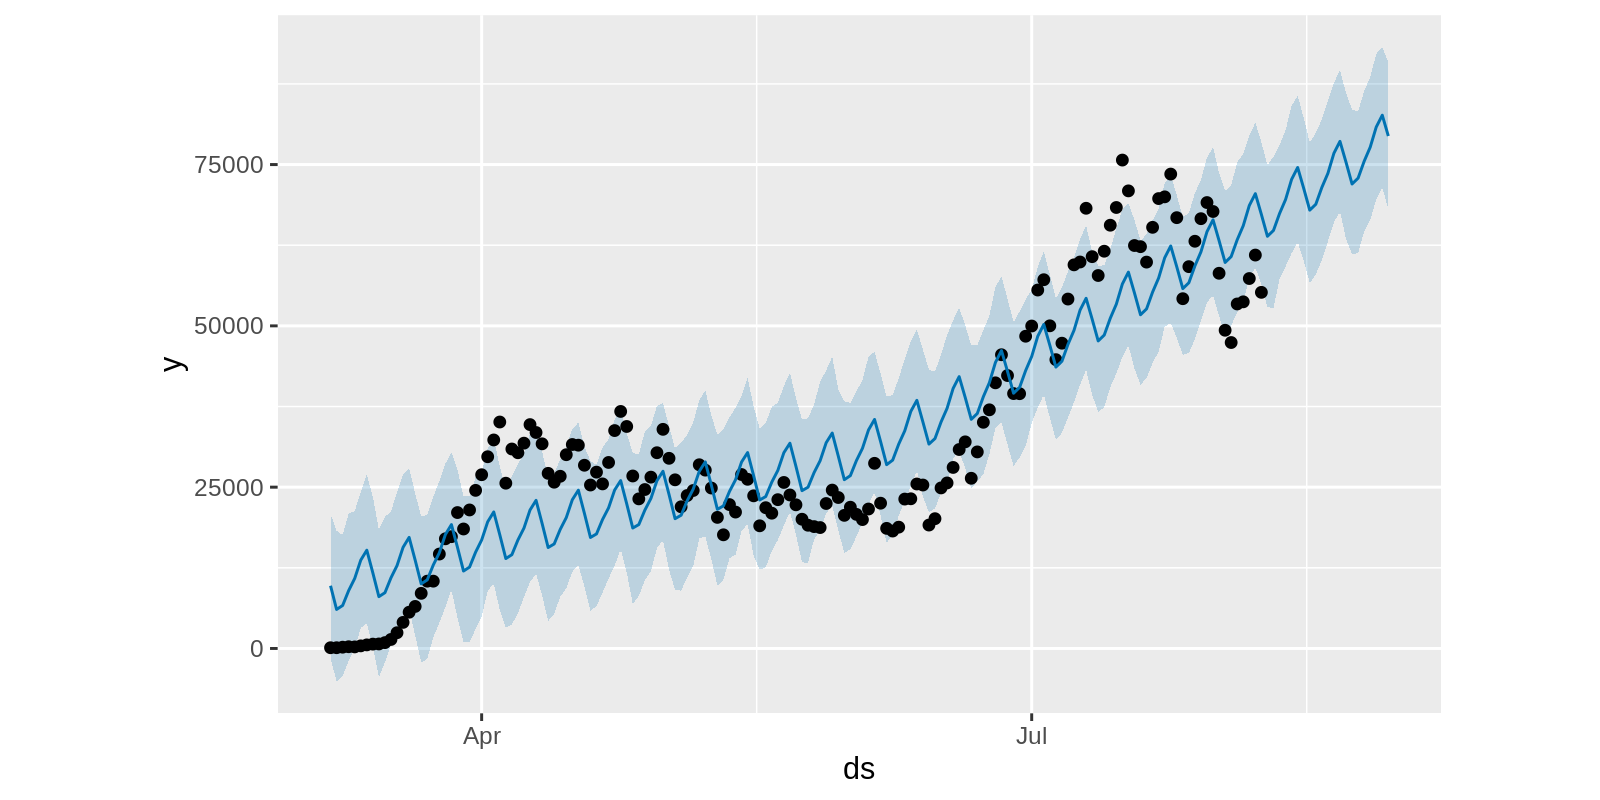

In [96]:
plot(m, forecast)

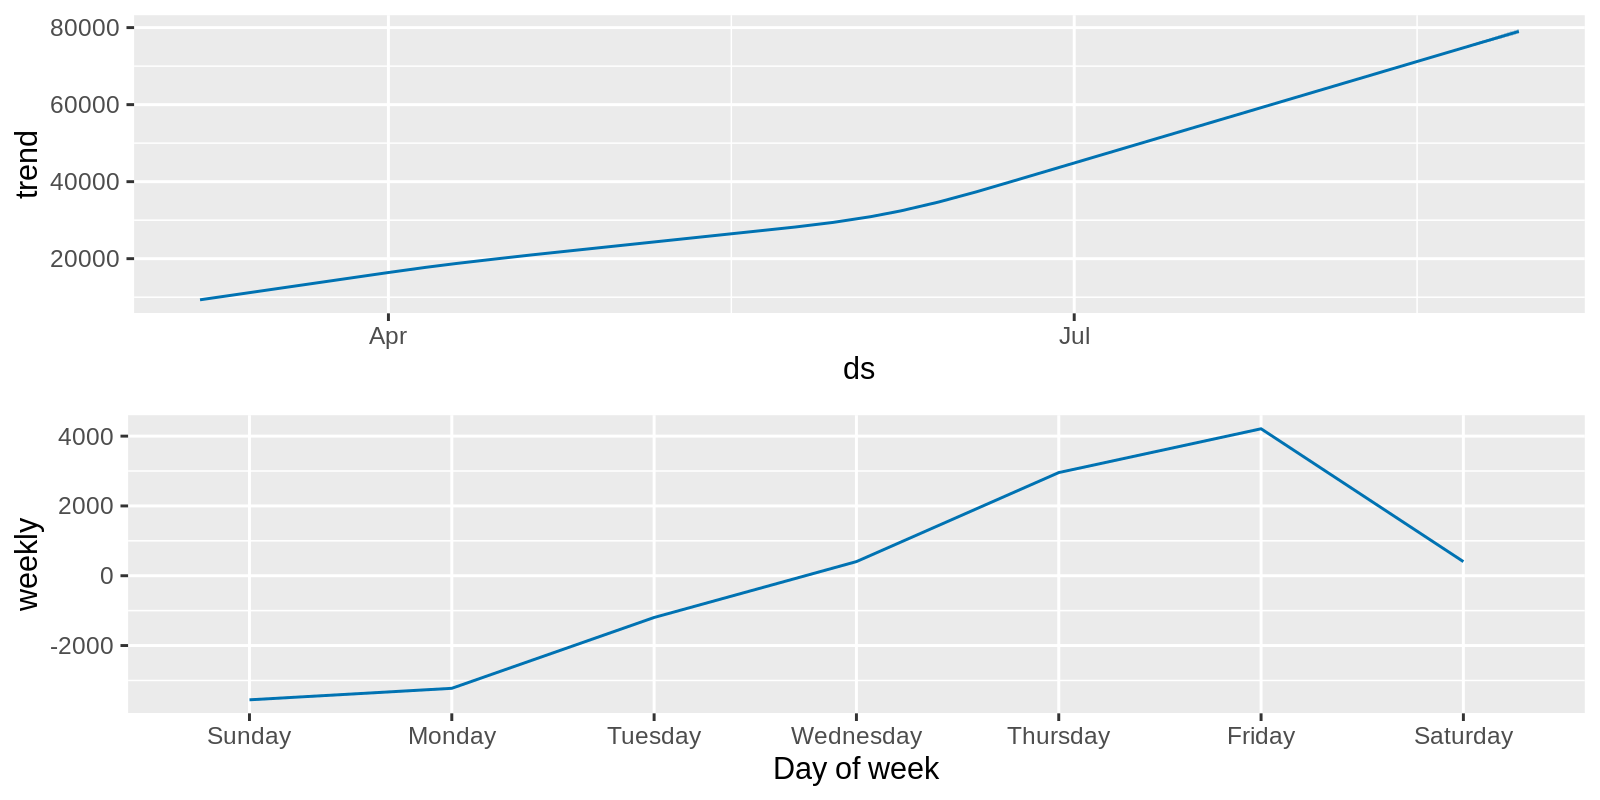

In [97]:
prophet_plot_components(m, forecast)

In [98]:
m

$growth
[1] "linear"

$changepoints
 [1] "2020-03-12 GMT" "2020-03-17 GMT" "2020-03-22 GMT" "2020-03-27 GMT"
 [5] "2020-04-01 GMT" "2020-04-06 GMT" "2020-04-10 GMT" "2020-04-15 GMT"
 [9] "2020-04-20 GMT" "2020-04-25 GMT" "2020-04-30 GMT" "2020-05-05 GMT"
[13] "2020-05-10 GMT" "2020-05-15 GMT" "2020-05-20 GMT" "2020-05-25 GMT"
[17] "2020-05-30 GMT" "2020-06-04 GMT" "2020-06-08 GMT" "2020-06-13 GMT"
[21] "2020-06-18 GMT" "2020-06-23 GMT" "2020-06-28 GMT" "2020-07-03 GMT"
[25] "2020-07-08 GMT"

$n.changepoints
[1] 25

$changepoint.range
[1] 0.8

$yearly.seasonality
[1] "auto"

$weekly.seasonality
[1] TRUE

$daily.seasonality
[1] "auto"

$holidays
NULL

$seasonality.mode
[1] "additive"

$seasonality.prior.scale
[1] 10

$changepoint.prior.scale
[1] 0.05

$holidays.prior.scale
[1] 10

$mcmc.samples
[1] 0

$interval.width
[1] 0.8

$uncertainty.samples
[1] 1000

$specified.changepoints
[1] FALSE

$start
[1] "2020-03-07 GMT"

$y.scale
[1] 75697

$logistic.floor
[1] FALSE

$t.scale
[1] 13305600
